In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("dataset.csv")
print(data)

      Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                        

In [5]:
X = data.loc[:, ["Inflation rate", "GDP"]]  
y = data["Target"] 
new=pd.DataFrame(X,y)
print(new)

          Inflation rate  GDP
Target                       
Dropout              NaN  NaN
Graduate             NaN  NaN
Dropout              NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN
...                  ...  ...
Graduate             NaN  NaN
Dropout              NaN  NaN
Dropout              NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN

[4424 rows x 2 columns]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [7]:
classifier = GaussianNB()

In [8]:
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = classifier.predict(X_test)
print(y_pred)

['Graduate' 'Graduate' 'Graduate' ... 'Graduate' 'Graduate' 'Graduate']


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5112951807228916


In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       417
    Enrolled       0.00      0.00      0.00       232
    Graduate       0.51      1.00      0.68       679

    accuracy                           0.51      1328
   macro avg       0.17      0.33      0.23      1328
weighted avg       0.26      0.51      0.35      1328



C:\Users\harin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
false_percentage = (1 - accuracy) * 100
print("False Percentage:", false_percentage)

False Percentage: 48.87048192771084


In [13]:
new=pd.DataFrame(X_test,y_pred)
print(new)

          Inflation rate  GDP
Graduate             NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN
...                  ...  ...
Graduate             NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN
Graduate             NaN  NaN

[1328 rows x 2 columns]


In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[  0,   0, 417],
       [  0,   0, 232],
       [  0,   0, 679]], dtype=int64)

In [16]:
import seaborn as sns

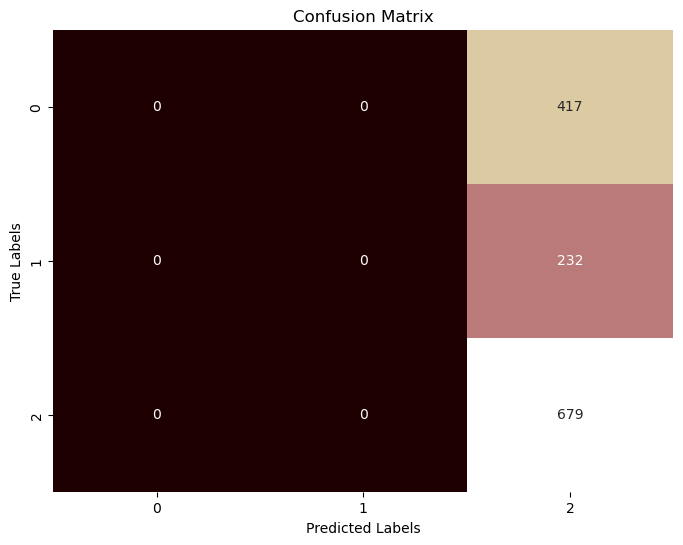

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()